In [1]:
import tensorflow as tf

In [2]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))

$ f(x,y) = \sqrt{(x^2 +y^2)}$

$ \nabla f(x,y) = \frac{\partial f}{\partial x} \hat{\imath} + \frac{\partial f}{\partial y} \hat{\imath}$

In [5]:
with tf.GradientTape() as tape:
    tape.watch(x)##I want to calcuate gradient wrt x
    f=tf.sqrt(tf.square(x) + tf.square(y))
    df_dx=tape.gradient(f,x)
    print(df_dx)

tf.Tensor(
[[ 0.9717826   0.50861585]
 [-0.09010362 -0.2214592 ]], shape=(2, 2), dtype=float32)


In [7]:
with tf.GradientTape() as tape:
    tape.watch(y)### I want to calculate gradient of y wrt y
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[[ 0.2358785  -0.8609936 ]
 [-0.9959324  -0.97516966]], shape=(2, 2), dtype=float32)


In [9]:
with tf.GradientTape() as tape:
    #tape.watch(x)
    #tape.watch(y)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

None
None


In [10]:
with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

tf.Tensor(
[[ 0.9717826   0.50861585]
 [-0.09010362 -0.2214592 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.2358785  -0.8609936 ]
 [-0.9959324  -0.97516966]], shape=(2, 2), dtype=float32)


# Without using tape we can calculate gradient by using tf.Variable

In [11]:
x1=tf.Variable(tf.random.normal(shape=(2,2)))
y1=tf.Variable(tf.random.normal(shape=(2,2)))

In [13]:
with tf.GradientTape() as tape:
    f=tf.sqrt(tf.square(x1)+tf.square(y1))
    df_dx,df_dy=tape.gradient(f,[x1,y1])
    print(df_dx)
    print(df_dy)

tf.Tensor(
[[0.91369456 0.9852344 ]
 [0.22150484 0.20765918]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.40640152  0.17121102]
 [-0.9751592  -0.97820115]], shape=(2, 2), dtype=float32)


In [14]:
x=tf.Variable(3.)
y=tf.Variable(2.)


In [15]:
with tf.GradientTape() as tape:
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dx,df_dy=tape.gradient(f,[x,y])
    print(df_dx)
    print(df_dy)

tf.Tensor(0.8320503, shape=(), dtype=float32)
tf.Tensor(0.5547002, shape=(), dtype=float32)


## Simple Linear Regreassion Example

$ f(x) =W.x +b $

In [21]:
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLES=1000
x=tf.random.normal(shape=[NUM_EXAMPLES])

In [43]:
noise=tf.random.normal(shape=[NUM_EXAMPLES])

In [44]:
y=x*TRUE_W + TRUE_B + noise

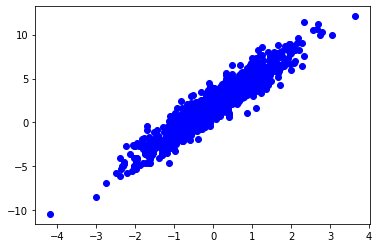

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c="b")
plt.show()

In [28]:
y=x*TRUE_W + TRUE_B 

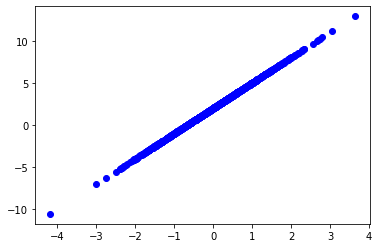

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c="b")
plt.show()

# Lest define a model

In [46]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        #initialize weights
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        
        return self.w*x+self.b

In [47]:
model=MyModel()

In [48]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [49]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [50]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [51]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

# Lest define the loss function

In [52]:
def MSE_loss(target_y, predicted_y):
    error=target_y-predicted_y
    squared_error=tf.square(error)
    mse=tf.reduce_mean(squared_error)
    return mse

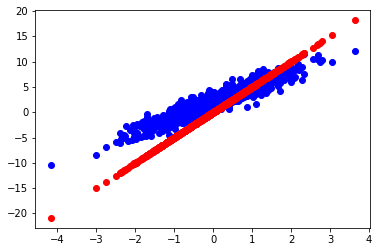

In [53]:
plt.scatter(x,y, c="b")
pred_y=model(x)## without training
plt.scatter(x,pred_y, c="r")
plt.show()

In [54]:
current_loss=MSE_loss(y, model(x))
current_loss.numpy()

8.928176

# Lets define the traning

In [59]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y, model(x))
    dc_dw,dc_db=tape.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate * dc_dw)
    model.b.assign_sub(learning_rate * dc_db)

In [60]:
model=MyModel()
ws,bs=[],[]
epochs=10
learning_rate=0.1
w=model.w.numpy()
b=model.b.numpy()
init_loss=MSE_loss(y, model(x))
print(f"Initial W: {w}, initial bias: {b}, initial_loss:{init_loss}")

Initial W: 5.0, initial bias: 0.0, initial_loss:8.928175926208496


In [61]:
for epoch in range(epochs):
    train(model,x,y,learning_rate)
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss=MSE_loss(y, model(x))
    print(f"For epoch: {epoch}, W: {ws[:-1]}, b: {bs[-1]}, Current_loss: {current_loss}")

For epoch: 0, W: [], b: 0.3861590325832367, Current_loss: 6.143885612487793
For epoch: 1, W: [4.600472], b: 0.6974221467971802, Current_loss: 4.345661163330078
For epoch: 2, W: [4.600472, 4.280295], b: 0.9483045339584351, Current_loss: 3.1842470169067383
For epoch: 3, W: [4.600472, 4.280295, 4.0236983], b: 1.150510549545288, Current_loss: 2.434103012084961
For epoch: 4, W: [4.600472, 4.280295, 4.0236983, 3.818048], b: 1.3134777545928955, Current_loss: 1.9495786428451538
For epoch: 5, W: [4.600472, 4.280295, 4.0236983, 3.818048, 3.653222], b: 1.4448151588439941, Current_loss: 1.6366108655929565
For epoch: 6, W: [4.600472, 4.280295, 4.0236983, 3.818048, 3.653222, 3.5211112], b: 1.5506573915481567, Current_loss: 1.434450626373291
For epoch: 7, W: [4.600472, 4.280295, 4.0236983, 3.818048, 3.653222, 3.5211112, 3.4152179], b: 1.6359503269195557, Current_loss: 1.3038619756698608
For epoch: 8, W: [4.600472, 4.280295, 4.0236983, 3.818048, 3.653222, 3.5211112, 3.4152179, 3.3303356], b: 1.7046809

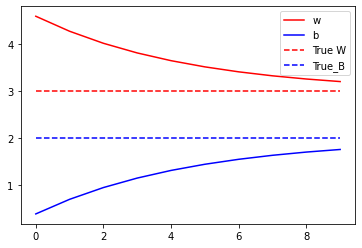

In [62]:
plt.plot(range(epochs), ws,'r',range(epochs),bs,'b')
plt.plot([TRUE_W] * epochs,"r--",[TRUE_B]*epochs,"b--")
plt.legend(["w","b","True W","True_B"])
plt.show()

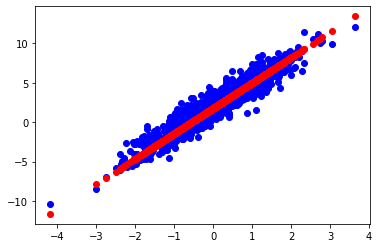

In [63]:
plt.scatter(x,y, c="b")
pred_y=model(x)## after training
plt.scatter(x,pred_y, c="r")
plt.show()